In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [2]:
data = pd.read_csv('creditdata.txt', sep=",", header = None)

In [3]:
cols= ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']

In [4]:
data.columns = cols

In [67]:
#data.head()

# Exploratory Data Analysis

In [6]:
#Numeric variables
data.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [7]:
#Categorical variables
data.describe(include=["O"])

,A1,A2,A4,A5,A6,A7,A9,A10,A12,A13,A14,A16
count,690,690,690,690,690,690,690,690,690,690,690,690
unique,3,350,4,4,15,10,2,2,2,3,171,2
top,b,?,u,g,c,v,t,f,f,g,00000,-
freq,468,12,519,519,137,399,361,395,374,625,132,383


In [8]:
#Credit approved is shown as '+' and not approved as '-'. We will transform these into 1 and 0 respectively 
data['A16'] = data['A16'].apply(lambda x: 0 if x == '-' else 1)

In [9]:
#Missing values are labeled  ‘?’. We will replace '?' the missing values to NA
data = data.replace('?', np.NaN)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null object
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null int64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null object
A15    690 non-null int64
A16    690 non-null int64
dtypes: float64(2), int64(3), object(11)
memory usage: 86.3+ KB


In [12]:
#Transforming A2  and A14 to numeric variables
data[['A2','A14']] = data[['A2','A14']].apply(pd.to_numeric)

In [13]:
data[['A2','A14']].describe()

,A2,A14
count,678.000000,677.000000
mean,31.568171,184.014771
std,11.957862,173.806768
min,13.750000,0.000000
25%,22.602500,75.000000
50%,28.460000,160.000000
75%,38.230000,276.000000
max,80.250000,2000.000000


In [14]:
#All the categorical variables
cat_variables = data.describe(include=["O"]).columns
cat_variables

Index(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'], dtype='object')

In [15]:
#All the continuous variables
cont_variables = data.describe().columns
cont_variables

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A16'], dtype='object')

## Missing values 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null int64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null float64
A15    690 non-null int64
A16    690 non-null int64
dtypes: float64(4), int64(3), object(9)
memory usage: 86.3+ KB


#There are a few missing values in A2 and A14 both continuous variables
#To impute, different methods can be used : plug in the mean value, median, randomly chose a value from the variable distribution or use a model like a linear regression model

In [32]:
#Imputing missing values in continuous variables A2, A14 using mean
data['A2'] = data['A2'].fillna(data['A2'].mean())
data['A14'] = data['A14'].fillna(data['A14'].mean())

In [112]:
data.describe()

,A2,A3,A8,A11,A14,A15,A16
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507,0.444928
std,11.853273,4.978163,3.346513,4.86294,172.159274,5210.102598,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,0.000000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,160.000000,5.000000,0.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000,1.000000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000,1.000000


In [20]:
cont_var = list(data.describe().columns)
cont_var
#Continuous variables are 'A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A16'

['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A16']

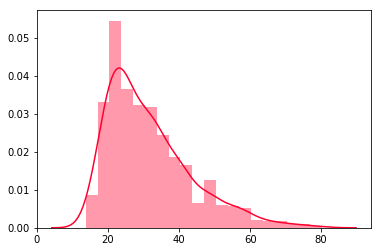

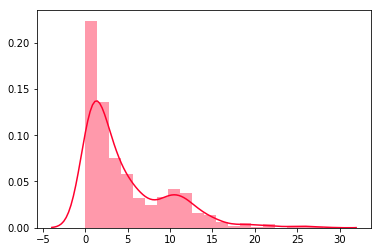

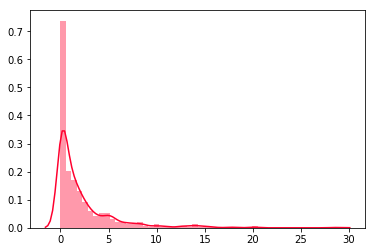

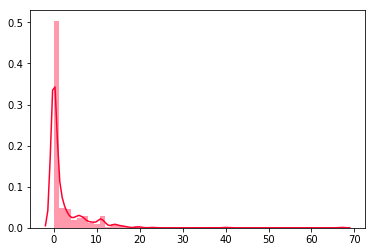

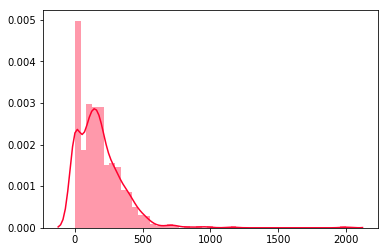

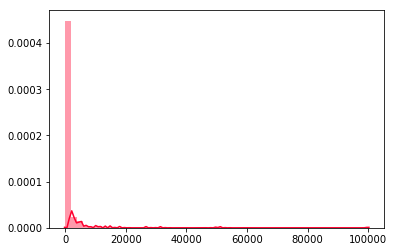

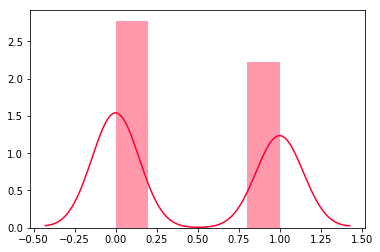

In [34]:
#cols = ["A2", "A3", "A8", "A11", "A14", "A15"]
for item in cont_var:
    sns.distplot(data[item].values, color = "#ff002e")
    plt.show()

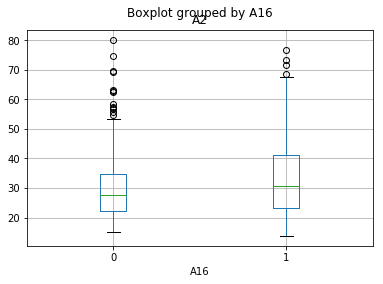

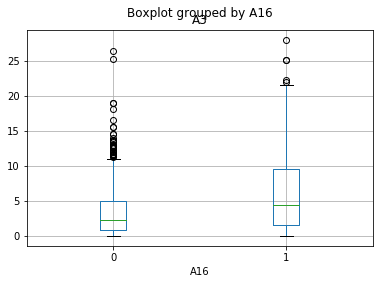

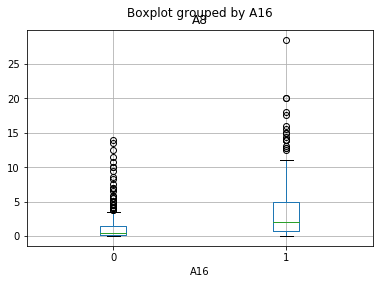

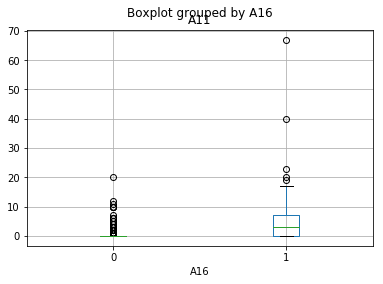

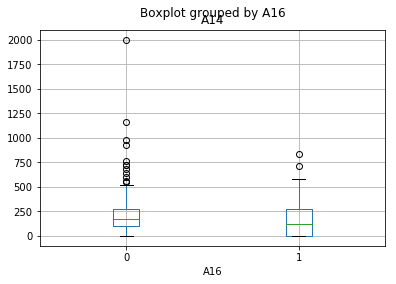

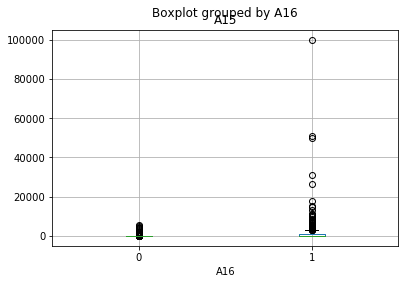

In [35]:
for item in cont_var[:-1]:
    data.boxplot(column= item, by='A16')
    plt.show()

**Most of the variable distributions have a long tail and have outliers. We will fit two models, one on the original variables 
and the other on transformed variables(take log and then standardize)**

In [39]:
to_log = ['A3','A8','A11','A14','A15']
yt_log = yt[to_log].applymap(lambda x: np.log(x+1))

In [40]:
yt_log['A16'] = yt['A16']
yt_log['A2'] = yt['A2']

In [41]:
yt_log.head()

,A3,A8,A11,A14,A15,A16,A2
0,0.000000,0.810930,0.693147,5.313206,0.000000,1,30.83
1,1.697449,1.396245,1.945910,3.784190,6.329721,1,58.67
2,0.405465,0.916291,0.000000,5.638355,6.715383,1,24.50
3,0.932164,1.558145,1.791759,4.615121,1.386294,1,27.83
4,1.890850,0.996949,0.000000,4.795791,0.000000,1,20.17


In [42]:
from sklearn import preprocessing
for item in cont_var:
    x = yt_log[item].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    yt_log[item] = x_scaled


C:\Users\Arjun\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Arjun\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Arjun\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single fea

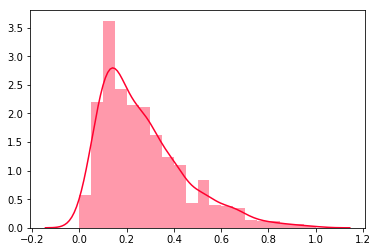

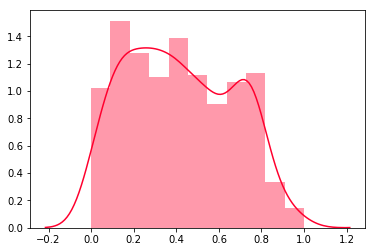

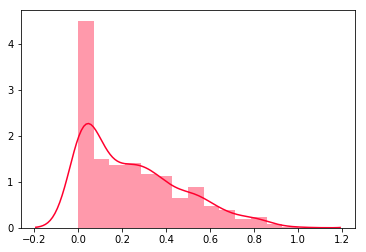

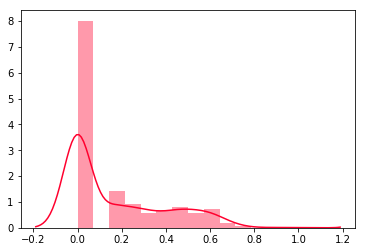

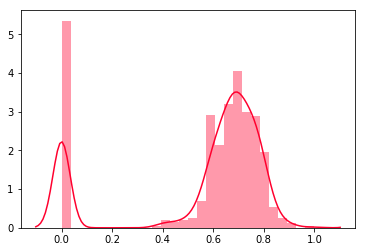

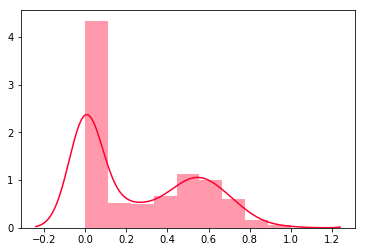

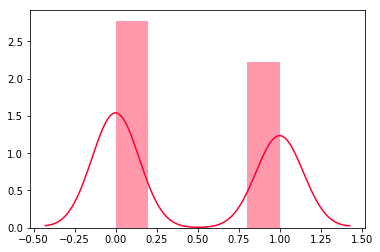

In [43]:
for item in cont_var:
    sns.distplot(yt_log[item].values, color = "#ff002e")
    plt.show()

In [44]:
yt.head()

,A2,A3,A8,A11,A14,A15,A16
0,30.83,0.000,1.25,1,202.0,0,1
1,58.67,4.460,3.04,6,43.0,560,1
2,24.50,0.500,1.50,0,280.0,824,1
3,27.83,1.540,3.75,5,100.0,3,1
4,20.17,5.625,1.71,0,120.0,0,1


In [46]:
cat_var = list(data.describe(include=['O']).columns)

In [47]:
data_temp = data[cat_var]
data_temp.info()
cat_var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 9 columns):
A1     678 non-null object
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A9     690 non-null object
A10    690 non-null object
A12    690 non-null object
A13    690 non-null object
dtypes: object(9)
memory usage: 48.6+ KB


['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [48]:
data_temp.head()

,A1,A4,A5,A6,A7,A9,A10,A12,A13
0,b,u,g,w,v,t,t,f,g
1,a,u,g,q,h,t,t,f,g
2,a,u,g,q,h,t,f,f,g
3,b,u,g,w,v,t,t,t,g
4,b,u,g,w,v,t,f,f,s


In [49]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 9 columns):
A1     678 non-null object
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A9     690 non-null object
A10    690 non-null object
A12    690 non-null object
A13    690 non-null object
dtypes: object(9)
memory usage: 48.6+ KB


In [50]:
#Imputing issing values in the categorical variables with the most frequent value
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0] for c in X], index = X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

xt = DataFrameImputer().fit_transform(data_temp)

In [51]:
xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 9 columns):
A1     690 non-null object
A4     690 non-null object
A5     690 non-null object
A6     690 non-null object
A7     690 non-null object
A9     690 non-null object
A10    690 non-null object
A12    690 non-null object
A13    690 non-null object
dtypes: object(9)
memory usage: 48.6+ KB


In [52]:
yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 7 columns):
A2     690 non-null float64
A3     690 non-null float64
A8     690 non-null float64
A11    690 non-null int64
A14    690 non-null float64
A15    690 non-null int64
A16    690 non-null int64
dtypes: float64(4), int64(3)
memory usage: 37.8 KB


## Analytical Modeling

Create the Model
Since the target value binary and can only take values of 1 or 0. The applicant either receives a credit card or is denied. Logistic regression is more useful is such cases as it can output probabilities that the target value is 1 or 0. Linear Regression might fit a line that can output negative values. Since, probabilities are always between 0 and 1 Logistic Regression seems to be more appropriate in such cases.

The model summary shows that the p-values for each coefficient. Alongside these coefficients, the summary gives R’s usual at-a-glance scale of asterisks for significance. Using this scale, we can see that the coefficients for AgeNorm and Debt3 are not significant. We can likely simplify the model by removing these two variables and get nearly the same accuracy.

In [72]:
dummy_ranks1 = pd.get_dummies(xt['A4'], prefix='A4')
dummy_ranks2 = pd.get_dummies(xt['A1'], prefix='A1')
dummy_ranks3 = pd.get_dummies(xt['A5'], prefix='A5')
dummy_ranks4 = pd.get_dummies(xt['A6'], prefix='A6')
dummy_ranks5 = pd.get_dummies(xt['A9'], prefix='A9')
dummy_ranks6 = pd.get_dummies(xt['A10'], prefix='A10')
dummy_ranks7 = pd.get_dummies(xt['A12'], prefix='A12')
dummy_ranks8 = pd.get_dummies(xt['A13'], prefix='A13')


In [54]:
zt = yt.join(dummy_ranks1)
zt = zt.join(dummy_ranks2)
zt = zt.join(dummy_ranks3)
zt = zt.join(dummy_ranks4)
zt = zt.join(dummy_ranks5)
zt= zt.join(dummy_ranks6)
zt = zt.join(dummy_ranks7)
zt = zt.join(dummy_ranks8)

In [55]:
cols_lr = list(zt.columns)
len(cols_lr)

38

In [56]:
cols_lr[6], cols_lr[37] = cols_lr[37], cols_lr[6]  

In [104]:
zt = zt[cols_lr]
zt.info()
zt = zt.apply(pd.to_numeric)
zt['A16']=yt['A16']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 38 columns):
A2       690 non-null float64
A3       690 non-null float64
A8       690 non-null float64
A11      690 non-null int64
A14      690 non-null float64
A15      690 non-null int64
A13_s    690 non-null uint8
A4_l     690 non-null uint8
A4_u     690 non-null uint8
A4_y     690 non-null uint8
A1_a     690 non-null uint8
A1_b     690 non-null uint8
A5_g     690 non-null uint8
A5_gg    690 non-null uint8
A5_p     690 non-null uint8
A6_aa    690 non-null uint8
A6_c     690 non-null uint8
A6_cc    690 non-null uint8
A6_d     690 non-null uint8
A6_e     690 non-null uint8
A6_ff    690 non-null uint8
A6_i     690 non-null uint8
A6_j     690 non-null uint8
A6_k     690 non-null uint8
A6_m     690 non-null uint8
A6_q     690 non-null uint8
A6_r     690 non-null uint8
A6_w     690 non-null uint8
A6_x     690 non-null uint8
A9_f     690 non-null uint8
A9_t     690 non-null uint8
A10_f    690 non-nu

In [103]:
train_cols = list(zt.columns[0:38])



In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(zt[train_cols[:-1]], zt['A16'], test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Arjun\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


# Training a Logistic Regression Model on original variables

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(zt[train_cols[:-1]], zt['A16'], test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [49]:
result.pred_table(threshold=0.5)

array([[ 330.,   53.],
       [ 107.,  200.]])

# Logistic Regression on transformed variables

In [75]:
zt_log = yt_log.join(dummy_ranks1)
zt_log = zt_log.join(dummy_ranks2)
zt_log = zt_log.join(dummy_ranks3)
zt_log = zt_log.join(dummy_ranks4)
zt_log = zt_log.join(dummy_ranks5)
zt_log = zt_log.join(dummy_ranks6)
zt_log = zt_log.join(dummy_ranks7)
zt_log = zt_log.join(dummy_ranks8)
#zt = zt.join(dummy_ranks3)
#zt = zt.join(dummy_ranks4)
#zt = zt.join(dummy_ranks5)
#zt= zt.join(dummy_ranks6)
#zt = zt.join(dummy_ranks7)
#zt = zt.join(dummy_ranks8)

In [92]:
zt_log.head()
trans_cols =list(zt_log.columns) 
len(trans_cols)

38

In [102]:
#trans_cols[5], trans_cols[37] = trans_cols[37], trans_cols[5]
#trans_cols[37] = 'A16'
trans_cols[5] = 'A13_s'
trans_cols[37] = 'A16'


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(zt_log[trans_cols[:-1]], zt_log['A16'], test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [101]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


### The accuracy of the model on the log-transformed dataset increased from 85 % to 87 %